In [1]:
import numpy as np
import itertools
import seaborn as sns

[Text(0.5, 1.0, 'Proability distribution of $W$ acknowledging $H_0$')]

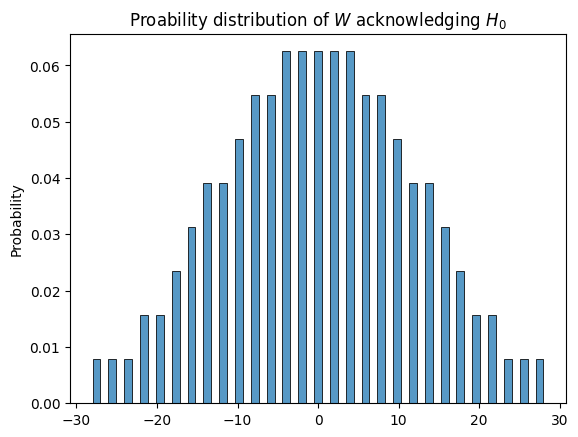

In [7]:
n = 7
e = np.arange(1, n+1)
vectors = list(itertools.product([-1, 1], repeat=n))
d = []
for v in vectors:
    T = np.dot(v, e)
    d.append(T)

sns.histplot(d, bins= n*(n+1) + 1, stat="probability").set(title="Proability distribution of $W$ acknowledging $H_0$")

In [9]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

np.random.seed(0)
n = 7
e = np.arange(1, n+1)
def get_test_power(mu, std=5.6, crit_val = 28, s = int(1e5), verbose = True):
    d = []
    for _ in tqdm(range(s), disable=not verbose):
        x = np.random.normal(loc=mu, scale=std, size=(7,))
        x = x[np.argsort(np.abs(x))]
        sign = (x >= 0).astype(int)*2 - 1
        d.append(np.dot(sign, e) < crit_val)
    return  1. - sum(d) / len(d)

Mu = np.linspace(0, 20, 100)
powers = [get_test_power(mu=mu, verbose=False) for mu in tqdm(Mu)]

plt.plot(Mu, powers, label="Power curve")

mu = 15.6
p = np.interp(mu, Mu, powers)
plt.scatter(mu, p, marker="x", c="purple", s=200)
plt.annotate(f'$\\mu = {mu}; 1 - \\beta = {p:0.3f}$', xy=(mu, p), xytext=(mu - 3.5, p-0.12),fontsize=11)

plt.ylabel("$1 - \\beta$")
plt.show()

100%|██████████| 100/100 [01:21<00:00,  1.23it/s]


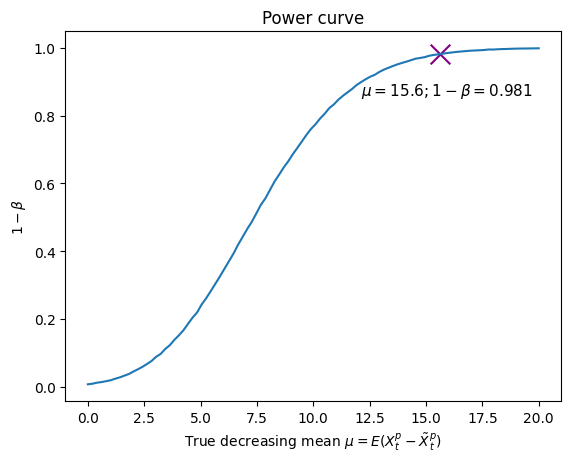

In [15]:
plt.plot(Mu, powers, label="Power curve")

mu = 15.6
p = np.interp(mu, Mu, powers)
plt.scatter(mu, p, marker="x", c="purple", s=200)
plt.annotate(f'$\\mu = {mu}; 1 - \\beta = {p:0.3f}$', xy=(mu, p), xytext=(mu - 3.5, p-0.12),fontsize=11)

plt.ylabel("$1 - \\beta$")
plt.show()